In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outlier=np.array([10,110,5,120])
data=np.concatenate([data,outlier])
print(data)

[ 54.96714153  48.61735699  56.47688538  65.23029856  47.65846625
  47.65863043  65.79212816  57.67434729  45.30525614  55.42560044
  45.36582307  45.34270246  52.41962272  30.86719755  32.75082167
  44.37712471  39.8716888   53.14247333  40.91975924  35.87696299
  64.65648769  47.742237    50.67528205  35.75251814  44.55617275
  51.1092259   38.49006423  53.75698018  43.9936131   47.0830625
  43.98293388  68.52278185  49.86502775  39.42289071  58.22544912
  37.7915635   52.08863595  30.40329876  36.71813951  51.96861236
  57.3846658   51.71368281  48.84351718  46.98896304  35.2147801
  42.80155792  45.39361229  60.57122226  53.4361829   32.36959845
  53.24083969  46.1491772   43.23078     56.11676289  60.30999522
  59.31280119  41.60782477  46.90787624  53.31263431  59.75545127
  45.20825762  48.14341023  38.93665026  38.03793376  58.12525822
  63.56240029  49.27989878  60.03532898  53.61636025  43.54880245
  53.61395606  65.38036566  49.64173961  65.64643656  23.80254896
  58.2190250

In [5]:
df=pd.DataFrame(data,columns=['values'])
print(df.head())

      values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


In [6]:
print(df.tail())

         values
99    47.654129
100   10.000000
101  110.000000
102    5.000000
103  120.000000


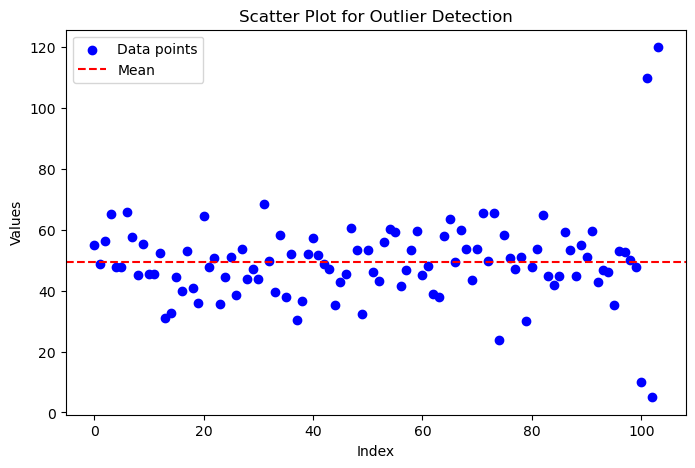

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['values'],color='blue',label='Data points')
plt.axhline(y=df['values'].mean(),color='red',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel('Values')
plt.title('Scatter Plot for Outlier Detection')
plt.legend()
plt.show()

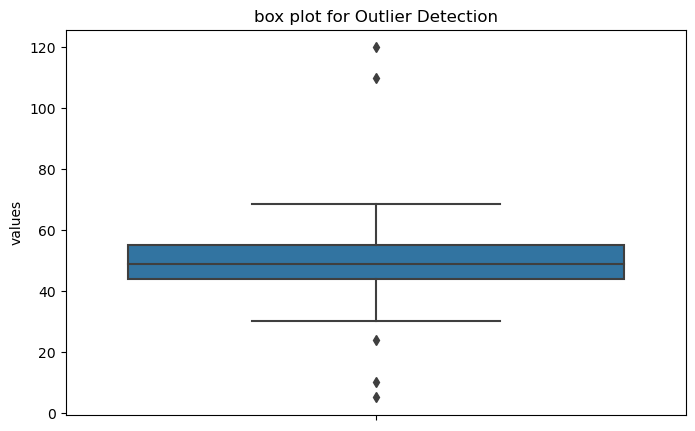

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='values')
plt.title("box plot for Outlier Detection")
plt.show()

In [10]:
df['Z-score']=zscore(df['values'])
df['Outlier_z']=df['Z-score'].apply(lambda x:'Outlier' if abs(x)>3 else 'Normal')
print(df[df['Outlier_z']=='Outlier'])

     values   Z-score Outlier_z
101   110.0  4.328173   Outlier
102     5.0 -3.175368   Outlier
103   120.0  5.042796   Outlier


In [12]:
Q1=df['values'].quantile(0.25)
Q3=df['values'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df['Outlier_IQR']=df['values'].apply(lambda x:'Outlier' if (x<lower_bound or x> upper_bound) else 'Normal')
print(df[df['Outlier_IQR']=='Outlier'])

         values   Z-score Outlier_z Outlier_IQR
74    23.802549 -1.831694    Normal     Outlier
100   10.000000 -2.818056    Normal     Outlier
101  110.000000  4.328173   Outlier     Outlier
102    5.000000 -3.175368   Outlier     Outlier
103  120.000000  5.042796   Outlier     Outlier


**Finding Outliers Using the IQR Method with a 5-Number Summary**
The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.

The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.
 
 

In [15]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outlier=np.array([10,110,5,120])
data=np.concatenate([data,outlier])

Q1 = np.percentile(data, 25)  
Q2 = np.median(data) 
Q3 = np.percentile(data, 75)  
min_value = np.min(data)     
max_value = np.max(data)     

IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data < lower_bound) | (data > upper_bound)]

print(f"Minimum Value: {min_value}")
print(f"First Quartile (Q1): {Q1}")
print(f"Third Quartile (Q3): {Q3}")
print(f"Maximum Value: {max_value}")
print(f"IQR: {IQR}")
print(f"Outliers: {outliers}")

Minimum Value: 5.0
First Quartile (Q1): 43.874401021766715
Third Quartile (Q3): 55.00852473036764
Maximum Value: 120.0
IQR: 11.134123708600924
Outliers: [ 23.80254896  10.         110.           5.         120.        ]


In [19]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
print(data)

[54.96714153 48.61735699 56.47688538 65.23029856 47.65846625 47.65863043
 65.79212816 57.67434729 45.30525614 55.42560044 45.36582307 45.34270246
 52.41962272 30.86719755 32.75082167 44.37712471 39.8716888  53.14247333
 40.91975924 35.87696299 64.65648769 47.742237   50.67528205 35.75251814
 44.55617275 51.1092259  38.49006423 53.75698018 43.9936131  47.0830625
 43.98293388 68.52278185 49.86502775 39.42289071 58.22544912 37.7915635
 52.08863595 30.40329876 36.71813951 51.96861236 57.3846658  51.71368281
 48.84351718 46.98896304 35.2147801  42.80155792 45.39361229 60.57122226
 53.4361829  32.36959845 53.24083969 46.1491772  43.23078    56.11676289
 60.30999522 59.31280119 41.60782477 46.90787624 53.31263431 59.75545127
 45.20825762 48.14341023 38.93665026 38.03793376 58.12525822 63.56240029
 49.27989878 60.03532898 53.61636025 43.54880245 53.61395606 65.38036566
 49.64173961 65.64643656 23.80254896 58.21902504 50.87047068 47.0099265
 50.91760777 30.12431085 47.80328112 53.57112572 64.77

In [22]:
from sklearn.utils import resample
df=pd.DataFrame({'Age':[22,25,27,28,30,35,40,45,50,55,60,65,70],
                 'Income':[2000,2500,2700,320,3500,3800,4000,4200,4300,4500,5000,5500,6000],
                 'Class':['High','Low','Low','High','High','Low','High','High','Low','Low','High','High','Low']
                })
print(df)
                 

    Age  Income Class
0    22    2000  High
1    25    2500   Low
2    27    2700   Low
3    28     320  High
4    30    3500  High
5    35    3800   Low
6    40    4000  High
7    45    4200  High
8    50    4300   Low
9    55    4500   Low
10   60    5000  High
11   65    5500  High
12   70    6000   Low


In [26]:
df_high=df[df['Class']=='High']
print(df_high)
df_low=df[df['Class']=='Low']
print(df_low)

    Age  Income Class
0    22    2000  High
3    28     320  High
4    30    3500  High
6    40    4000  High
7    45    4200  High
10   60    5000  High
11   65    5500  High
    Age  Income Class
1    25    2500   Low
2    27    2700   Low
5    35    3800   Low
8    50    4300   Low
9    55    4500   Low
12   70    6000   Low


In [25]:
df_high_downsampled=resample(df_high,replace=False,n_samples=len(df_low),random_state=42)
print(df_high_downsampled)

    Age  Income Class
0    22    2000  High
3    28     320  High
10   60    5000  High
4    30    3500  High
7    45    4200  High
6    40    4000  High


In [27]:
df_balanced=pd.concat([df_high_downsampled,df_low])
print(df_balanced)

    Age  Income Class
0    22    2000  High
3    28     320  High
10   60    5000  High
4    30    3500  High
7    45    4200  High
6    40    4000  High
1    25    2500   Low
2    27    2700   Low
5    35    3800   Low
8    50    4300   Low
9    55    4500   Low
12   70    6000   Low


In [28]:
print(df_balanced['Class'].value_counts())

Class
High    6
Low     6
Name: count, dtype: int64


In [29]:
df=pd.DataFrame({'Age':[22,25,27,28,30,35,40,45,50,55,60,65,70],
                 'Income':[2000,2500,2700,320,3500,3800,4000,4200,4300,4500,5000,5500,6000],
                 'Class':['High','High','High','High','High','Low','High','High','Low','Low','High','High','Low']
                })
print(df)

    Age  Income Class
0    22    2000  High
1    25    2500  High
2    27    2700  High
3    28     320  High
4    30    3500  High
5    35    3800   Low
6    40    4000  High
7    45    4200  High
8    50    4300   Low
9    55    4500   Low
10   60    5000  High
11   65    5500  High
12   70    6000   Low


In [31]:
df_high=df[df['Class']=='High']
print(df_high)
df_low=df[df['Class']=='Low']
print(df_low)

    Age  Income Class
0    22    2000  High
1    25    2500  High
2    27    2700  High
3    28     320  High
4    30    3500  High
6    40    4000  High
7    45    4200  High
10   60    5000  High
11   65    5500  High
    Age  Income Class
5    35    3800   Low
8    50    4300   Low
9    55    4500   Low
12   70    6000   Low


In [35]:
df_low_upsampled=resample(df_low,replace=True,n_samples=len(df_high),random_state=42)
print(df_low_upsampled)

    Age  Income Class
9    55    4500   Low
12   70    6000   Low
5    35    3800   Low
9    55    4500   Low
9    55    4500   Low
12   70    6000   Low
5    35    3800   Low
5    35    3800   Low
9    55    4500   Low


In [36]:
df_balanced=pd.concat([df_low_upsampled,df_high])
print(df_balanced)

    Age  Income Class
9    55    4500   Low
12   70    6000   Low
5    35    3800   Low
9    55    4500   Low
9    55    4500   Low
12   70    6000   Low
5    35    3800   Low
5    35    3800   Low
9    55    4500   Low
0    22    2000  High
1    25    2500  High
2    27    2700  High
3    28     320  High
4    30    3500  High
6    40    4000  High
7    45    4200  High
10   60    5000  High
11   65    5500  High


In [37]:
print(df_balanced['Class'].value_counts())

Class
Low     9
High    9
Name: count, dtype: int64


In [38]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


***SMOTE(Synthetic minority over sampling technique) to balance the data.

1.SMOTE to generate synthetic samples instead of duplicating existing ones.

2.Convert categorial class labels into numeric form for SMOTE to work.

3.Apply SMOTE  to balance the dataset.

4.Convert back to original categorial labels.

5.Combine the resampled data into a final balance dataset.

In [41]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip uninstall scikit-learn imbalanced-learn -y


Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: imbalanced-learn 0.10.1
Uninstalling imbalanced-learn-0.10.1:
  Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install -U scikit-learn imbalanced-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a1/a6/c5b78606743a1f28eae8f11973de6613a5ee87366796583fb74c67d54939/scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Obtaining dependency information for sklearn-compat<1,>=0.1 from https://files.pythonhosted.org/packages/f0/a8/ad69cf130fbd017660cdd64abbef3f28135d9e2e15fe3002e03c5be0ca38/sklearn_compat-0.1.3-py3-none-any.whl.metadata
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl 

In [51]:
pip install -U imbalanced-learn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install imbalanced-learn==0.8.0 scikit-learn==0.24.2


  Obtaining dependency information for imbalanced-learn==0.8.0 from https://files.pythonhosted.org/packages/80/98/dc784205a7e3034e84d41ac4781660c67ad6327f2f5a80c568df31673d1c/imbalanced_learn-0.8.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB 960.0 kB/s eta 0:00:08
     -- ------------------------------------- 0.5/7.5 MB 6.0 MB/s eta 0:00:02
     ----- ---------------------------------- 1.0/7.5 MB 7.9 MB/s eta 0:00:01
     ------- -------------------------------- 1.5/7.5 MB 8.6 MB/s eta 0:00:01
     ---------- ----------------------------- 2.0/7.5 MB 8.9 MB/s eta 0:00:01
     ------------- -------------------------- 2.5/7.5 MB 9.4 MB/s eta 0:00:01
     ------------- -------------------------- 2.5/7.5 MB 9.5 MB/s eta 0:00:01
     ------------- -------------------------- 2.5/7.5 MB 9.5 MB/s eta 0:00:01
     ------------- -------------------------- 2.5/7.5 MB 9.5 MB/s eta 0:00:01
 

  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [59 lines of output]
  <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  Partial import of sklearn during the build process.
  <string>:116: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\Users\CVR\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process